**Describing data**

For the last homework we discussed some simple commands for working with data frames using the FBI's UCR. With this homework, we'll get a bit more elaborate, venturing into exploratory analysis -- pulling stories from data. The practice involves repeated "looks" at a data set. A "look" might be some graphical representation of the data like a plot, or the output of some form of computation like a numerical summary, a table, or a "model" fit. We'll see all of them in this homework, under the heading of "description." 

Statistians are exceptionally visual people, obsessed with "seeing" what the data have to offer, and "views" maybe provided through a variety of computational means. Our first descriptions will be graphical. As a journalist, you might think of this attempt to "see" as a kind of interview process, with each subsequent look, a follow-up question. R is, by design, expressive in statistical computations and graphics, meaning it allows us to formulate and act on statistical ideas in an easy way. 

**The Behavioral Risk Surveillance Survey**

In the PDF file with this lesson, we introduced the BRFSS, a regular survey conducted by the CDC. Rather than give you the whole thing, we created a subset of variables to work with. Let's go over them and use them to examine some simple plotting devices. I've put it on github in R's own data format. (The reason for this is that some of the variables in the data set are categorical and we want an "order" to the categories -- like poor < good < very good < excellent.)

You can either download the file from github or `source()` it directly from the site. Here we use `source()` because the data are in R's own format, as opposed to `read.csv()` which we used when the data consisted of a CSV file. 

In [1]:
source("https://github.com/cocteau/lede2018/blob/master/data/cdc.R?raw=true")
head(cdc)

genhlth,physhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
good,0,0,1,0,70,175,175,77,m
good,30,0,1,1,64,125,115,33,f
good,2,1,1,1,60,105,105,49,f
good,0,1,1,0,66,132,124,42,f
very good,0,0,1,0,61,150,130,55,f
very good,0,1,1,0,64,114,114,55,f


The variables could be looked up in the codebook that comes along with the CDC data. For simplicity, we give them here.
<br><br>
`genhlth` - The respondent's general health
<br> `physhlth` - For how many days during the past 30 days was the respondent's physical health not good?
<br> `exerany` - Has the respondent exercised in the last 30 days? (1 = yes, 0 = no)
<br> `hlthplan` - Does the respondent have a healthplan? (1 = yes, 0 = no)
<br> `smoke100` - Has the respondent smoked at least 100 cigarettes in their lifetime? (1 = yes, 0 = no)
<br> `height` - Respondent's height (inches)
<br> `weight` - Respondent's weight (pounds)
<br> `wtdesire` - The respondent's desired weight (pounds)
<br> `age` - The respondent's age (years)
<br> `gender` - The respondent's sex

We can classify variables like the ones above into two kinds -- qualitative (categorical) or quantitative. 

>**Qualitative variables** “arise when individuals may fall into separate” categories which may not have a numerical relationship (a person's name or gender, for example) -- Qualitative data may be ordinal in the sense that there is a natural order to the categories. In the data above, `genhlth` is ordinal.
<br><br>
**Quantitative variables**, on the other hand, are numerical, “arising from counts or measurements” -- These data can, in turn, be loosely described as being continuous (able to take any number) or discrete (integers, say, or numerical values with just a small number of unique entries)

For each of the variables in the `cdc` data frame, indicate whether it is qualitative or quantitative. Keep in mind that some responses might be coded as numeric values, but represent a qualitative variable.

**Put your answer here**

`genhlth` - qualitative
<br> `physhlth` - quantitative
<br> `exerany` - qualitative
<br> `hlthplan` - qualitative
<br> `smoke100` - qualitative
<br> `height` - quantitative
<br> `weight` - quantitative
<br> `wtdesire` - quantitative
<br> `age` - quantitative
<br> `gender` - qualitative

**dplyr, take two.** The syntax so far is pretty simple. We have a data frame, R's answer to a simple table of data, and for the most part we have been using dollar signs to extract data from the table. And we will soon see simple functions that can summarize or do other things to the data. 

Much of statistics has to do with simple manipulations on tables. It's so important, in fact, that people have contributed tools that make these operations easy. We've introduced the dpyr package last time, but didn't really use it much. We will now.

As we said before, you can think of R as being driven by "verbs". We have seen read.csv() and summary() and hist(), for example. We'll now make more extensive use of dplyr. It introduces a new set of verbs which, in each case, **takes a table (a data frame) as input and returns another, altered data frame as output.** These functions let you specify subsets, sort on columns, and create new columns. But in each case, you give a table and you get a table.

- filter()
- arrange()
- select()
- distinct()
- mutate()
- summarise()
- group_by()
- sample_n()

The dplyr command glimpse() is a nice way to decide if your data are qualitative or quantitative. R's implementation of a qualitative variable is known as a "factor" and is denoted `fct` in the display below. An qualitative variable with ordered categories is denoted by `ord`.

In [2]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
glimpse(cdc)

Observations: 20,000
Variables: 10
$ genhlth  <ord> good, good, good, good, very good, very good, very good, v...
$ physhlth <dbl> 0, 30, 2, 0, 0, 0, 0, 1, 2, 3, 4, 30, 0, 0, 3, 0, 0, 30, 0...
$ exerany  <dbl> 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1...
$ hlthplan <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1...
$ smoke100 <dbl> 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0...
$ height   <dbl> 70, 64, 60, 66, 61, 64, 71, 67, 65, 70, 69, 69, 66, 70, 69...
$ weight   <int> 175, 125, 105, 132, 150, 114, 194, 170, 150, 180, 186, 168...
$ wtdesire <int> 175, 115, 105, 124, 130, 114, 185, 160, 130, 170, 175, 148...
$ age      <int> 77, 33, 49, 42, 55, 55, 31, 45, 27, 44, 46, 62, 21, 69, 23...
$ gender   <fct> m, f, f, f, f, f, m, m, f, m, m, m, m, m, m, m, m, m, m, f...


**Frequency displays for qualitative data.** For qualitative or categorical data, the most obvious summary is a simple tabulation or count of the categories. The command table() can return this for you. From there, you have a variety of "frequency displays" that help make the comparison of counts more legible. We'll show a barplot and its cousin the mosaicplot.

Remember that you "extract" a column of data from a data table (data frame) with the dollar sign, or you can use the dplyr verb `select()`. You can then pass it to some kind of summary function -- in this case table() to count cases.

In [4]:
head(select(cdc,gender))

gender
m
f
f
f
f
f


In [5]:
table(select(cdc,gender))


    m     f 
 9569 10431 

A barplot summarizes these counts with, well, bars. Each bar is associated with one of the counts in the table above.

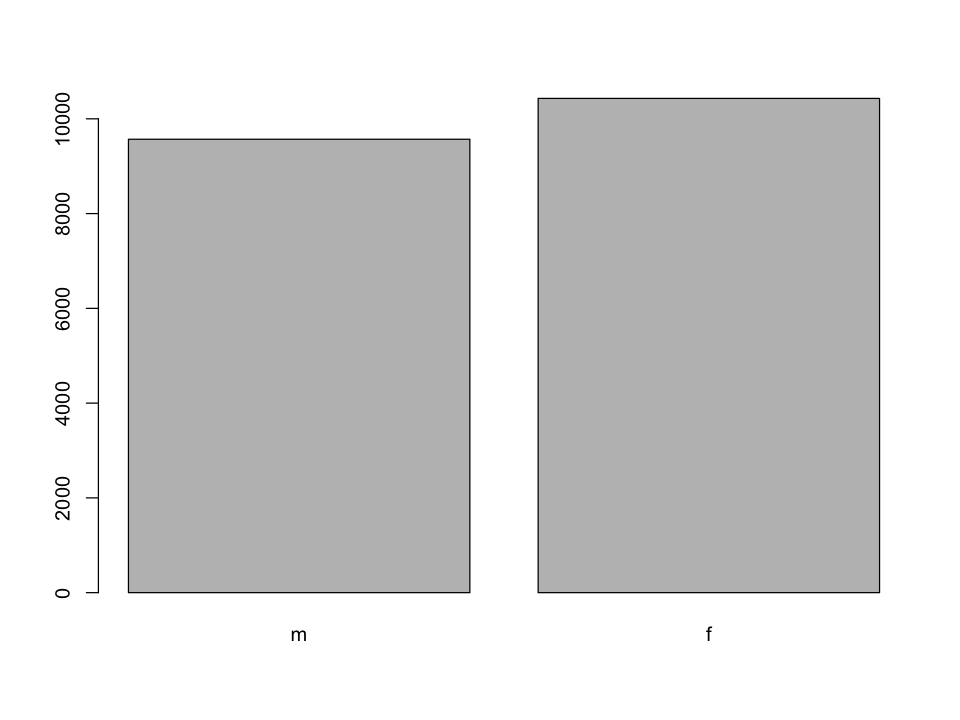

In [6]:
options(repr.plot.width=8, repr.plot.height=6)

barplot(table(select(cdc,gender)))

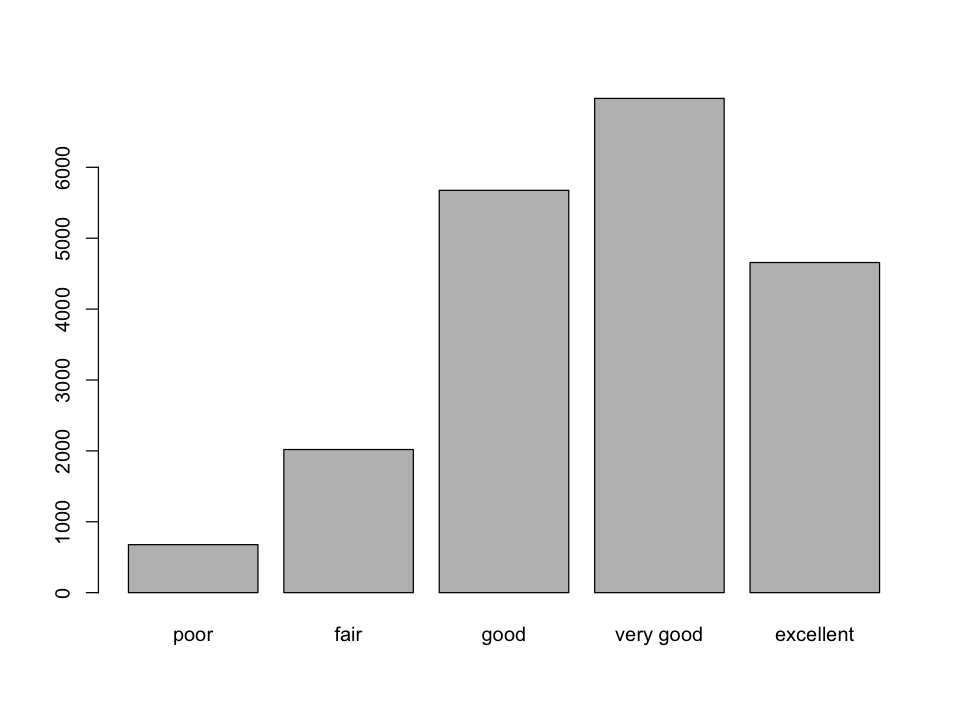

In [7]:
# make a barplot of another qualitative variable
barplot(table(select(cdc,genhlth)))


As we have seen, we can tabulate any number of variables. Here we cross a respondent's general health and whether they've exercised recently. What do you think?

In [8]:
table(select(cdc,genhlth,exerany))

           exerany
genhlth        0    1
  poor       384  293
  fair       857 1162
  good      1731 3944
  very good 1352 5620
  excellent  762 3895

It can be hard to read a table like this, and so we appeal to a graphical display. The cousin of the barplot is the so-called mosaic plot. Let's make one and then describe what it means. (The first command below creates a square plot 6 by 6.)

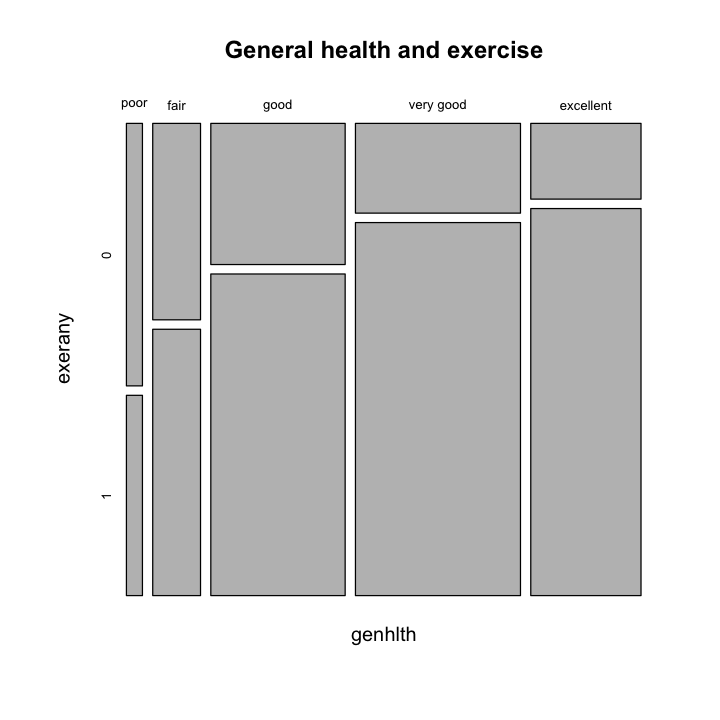

In [9]:
options(repr.plot.width=6, repr.plot.height=6)

mosaicplot(table(select(cdc,genhlth,exerany)),main="General health and exercise")

The plot is constructed as follows. The width of each bar is set in proportion to the counts of `genhlth`. And so...

In [10]:
table(select(cdc,genhlth))


     poor      fair      good very good excellent 
      677      2019      5675      6972      4657 

The `poor` column is the thinnest and `very good` is widest, because these two categories have the least and most counts, respectively. The `fair` column is a bit less than half the width of the `excellent` column, and so on.

Having set the width, we then set the heights of the boxes according to the proportion of people in each health category who have or have not exercised. And so...

In [11]:
table(select(cdc,genhlth,exerany))

           exerany
genhlth        0    1
  poor       384  293
  fair       857 1162
  good      1731 3944
  very good 1352 5620
  excellent  762 3895

In the `poor` column, we have more people who have not exercised (category 0) than who have (category 1). This 0 box is taller than the 1 box for this column. As we move from `fair` to `excellent`, the proportion of respondents in each category who have exercised increases and so the box associated with category 0 shrinks, while the box for category 1 grows. 

**In the end, the area of each rectangle is proportional to the counts of the cells in the corresponding table.** The count for the cell corresponding to people in poor health who have exercised is the smallest, and the corresponding rectangle in the plot is the smallest. 

Got it?

We can get a little fancier with some color. We can also provide some labels that make the chart more legible. What does it show?

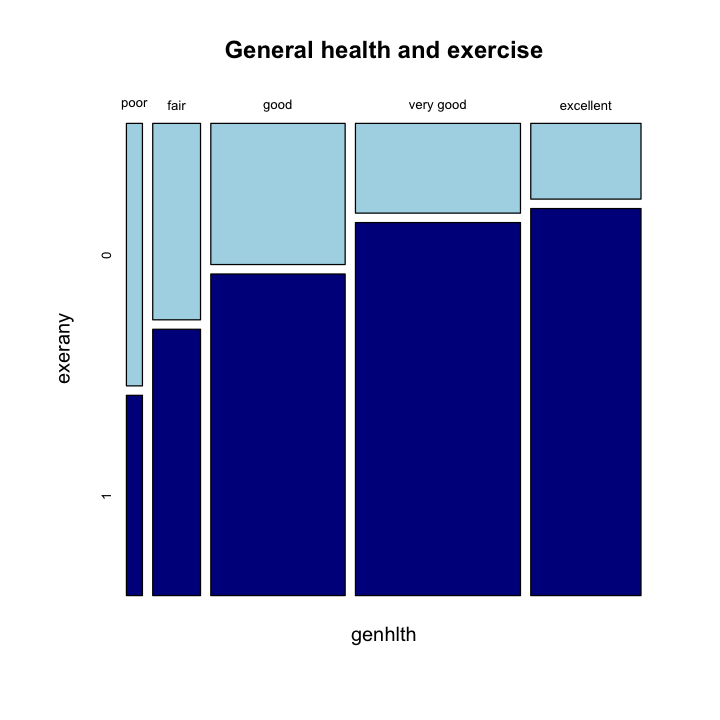

In [12]:
mosaicplot(table(select(cdc,genhlth,exerany)),col=c("lightblue","darkblue"),main="General health and exercise")

If you think about it, there are actually two mosaic plots to be made with these two variables. We can also look a the "transpose" to see a different kind of relationship. 

In [13]:
table(select(cdc,exerany,genhlth))

       genhlth
exerany poor fair good very good excellent
      0  384  857 1731      1352       762
      1  293 1162 3944      5620      3895

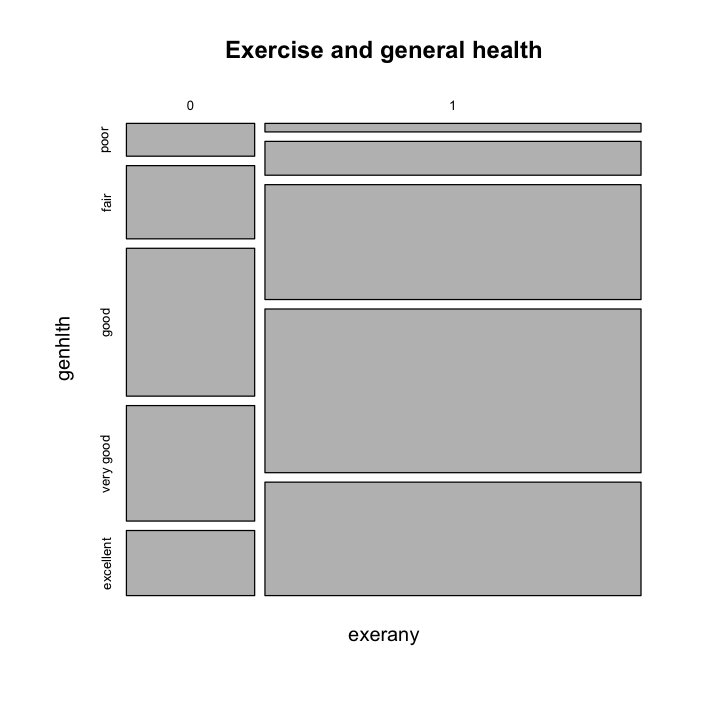

In [14]:
mosaicplot(table(select(cdc,exerany,genhlth)),main="Exercise and general health")

With this new table, we first make the columns proportional to the number of people who have or have not exercised in the last 30 days. And so...

In [15]:
table(select(cdc,exerany))


    0     1 
 5086 14914 

The 1 column is about three times as wide as the 0. Then within these two columns, we size the boxes according to the counts of the different overall health responses. What is the story here?

To make this a bit nicer, we can use colors that come from a range. The Color Brewer package in R that is meant to take some of the guesswork out of choosing colors for displays like these or, its primary use, for mapping. You can choose colors depending on the kind of data you are representing (qualitative or quantitative) as well as its intended end-use or even its audience. The color "palettes" were designed by Prof. Cynthia Brewer, a geographer at Penn State and you can [see them here.](http://colorbrewer2.org/) 

In [16]:
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/3.5/site-library’
(as ‘lib’ is unspecified)


Once installed, let's use it. We can generate all the color "palettes" that it knows about.

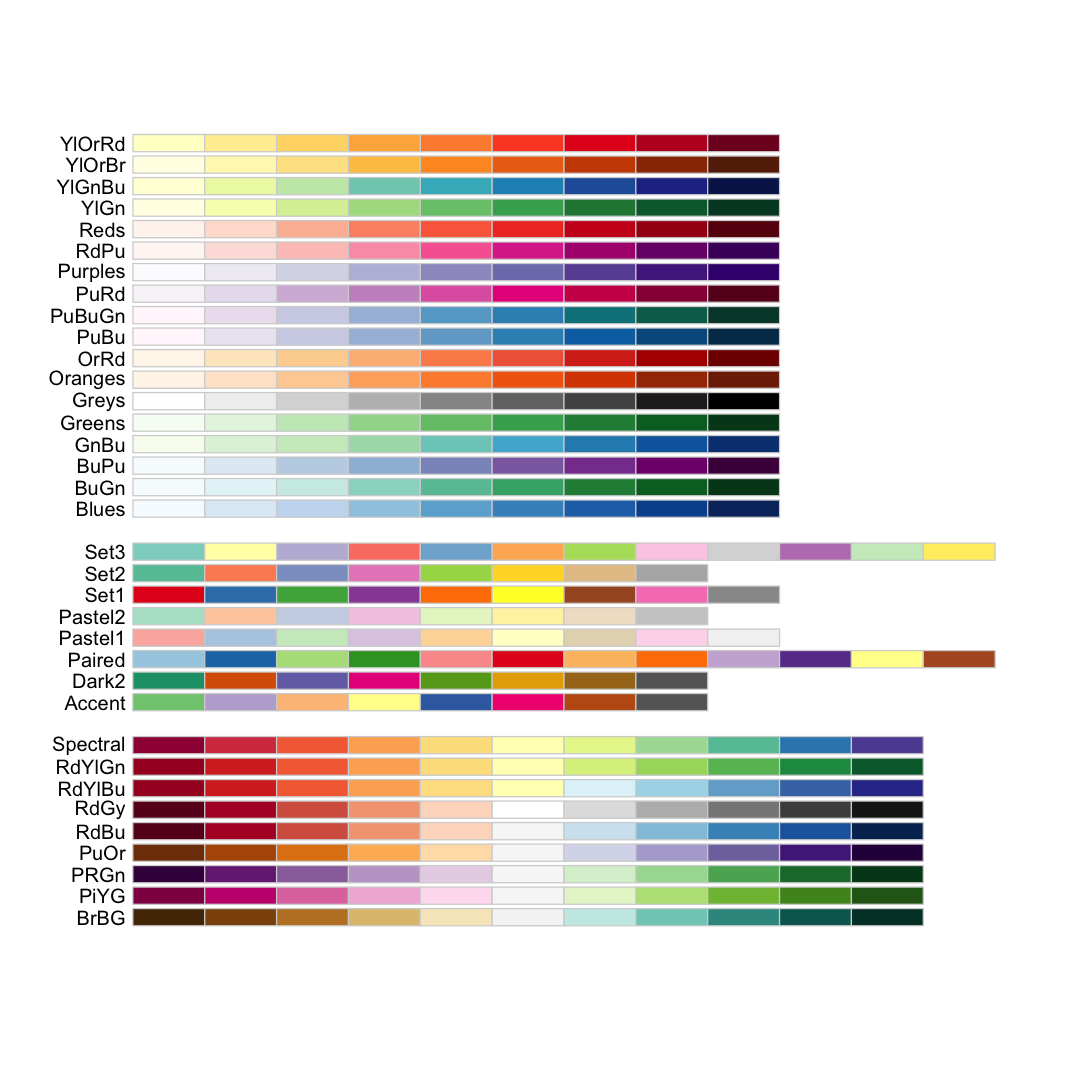

In [17]:
options(repr.plot.width=9, repr.plot.height=9)

library(RColorBrewer)
display.brewer.all()

You see sequential palettes at the top that go from light to dark. These are good for qualitative variables. Why? Then we have divergent palettes that are good for categorical variables because they are as different as they can be. And then you have palettes that go from one color, through white, into another color. These are good if you have negative and positive values, say, and take white for zero.

In our case we need five colors because there are five levels of `genhlth`. Let's use `Greens`.

In [18]:
pal <- brewer.pal(5,"Greens")
pal

[1] "#EDF8E9" "#BAE4B3" "#74C476" "#31A354" "#006D2C"

The strings above represent the RGB values of the green colors in hexadecimal form.

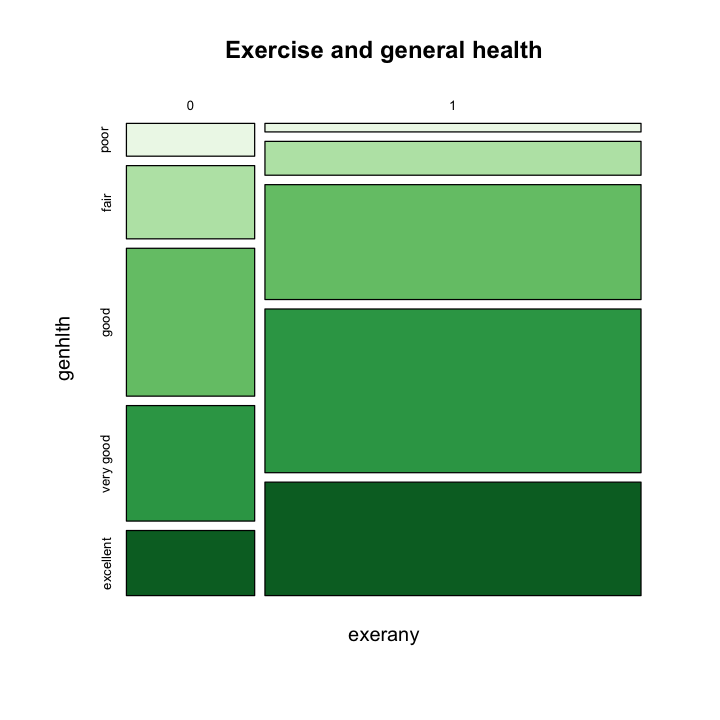

In [19]:
options(repr.plot.width=6, repr.plot.height=6)

mosaicplot(table(select(cdc,exerany,genhlth)),col=pal,main="Exercise and general health")

Make a mosaic plot of two other variables. Try adding color. What do you see?

Warning message in brewer.pal(2, "OrRd"):
“minimal value for n is 3, returning requested palette with 3 different levels
”

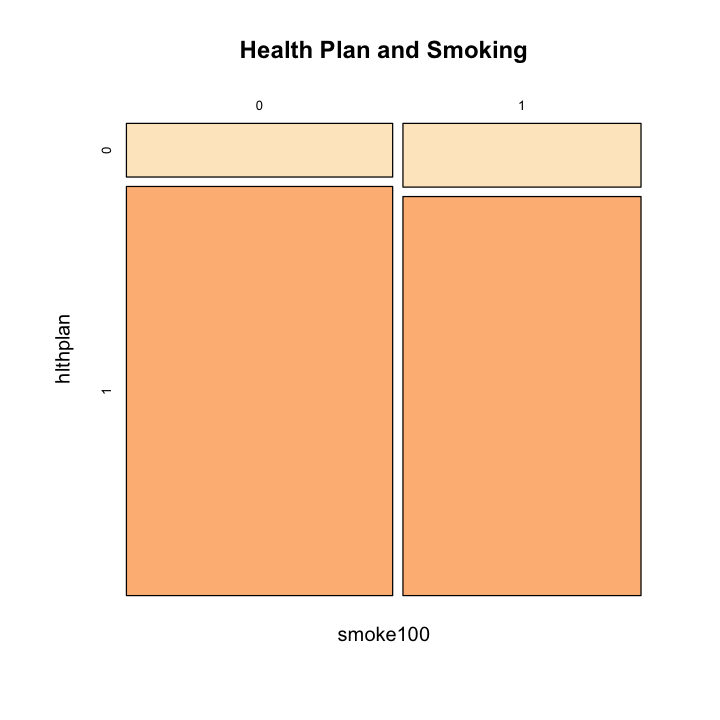

In [25]:
# put your code here
options(repr.plot.width=6, repr.plot.height=6)
pal  <- brewer.pal(2,"OrRd")

mosaicplot(table(select(cdc,smoke100,hlthplan)),col=pal,main="Health Plan and Smoking")


**Interpret the plot here**
There are slightly more non-smokers that have a health plan as opposed to smokers.


**Frequency displays for quantitative variables.** With quantitative data we will want to see the "shape" of the distribution. We do this for several reasons. First, if there are multiple "modes" (bumps or clusters), you might want to figure out why. Multiple bumps means there are groups of data points that are more similar to each other than to the rest of the data set. These might suggest groups of respondents. 

The easiest frequency display is just a "histogram". In this case, we divide the range from the minimum to the maximum value of the variable into equally space "bins" and then count how many points we have in each bin. These counts are represented by the heights of bars in the plot. 

Here we look at the heights of women.

In [26]:
women <- filter(cdc,gender=="f")
dim(women)

[1] 10431    10

Before we get there, remember that `select()` takes in a data frame and gives a data frame. The default version of `hist()` wants a vector of data instead. To extract a vector of data like we would get with the dollar sign, we can use the dplyr verb `pull()` -- it is an exception to the pattern of dplyr commands taking data frames and returning data frames.

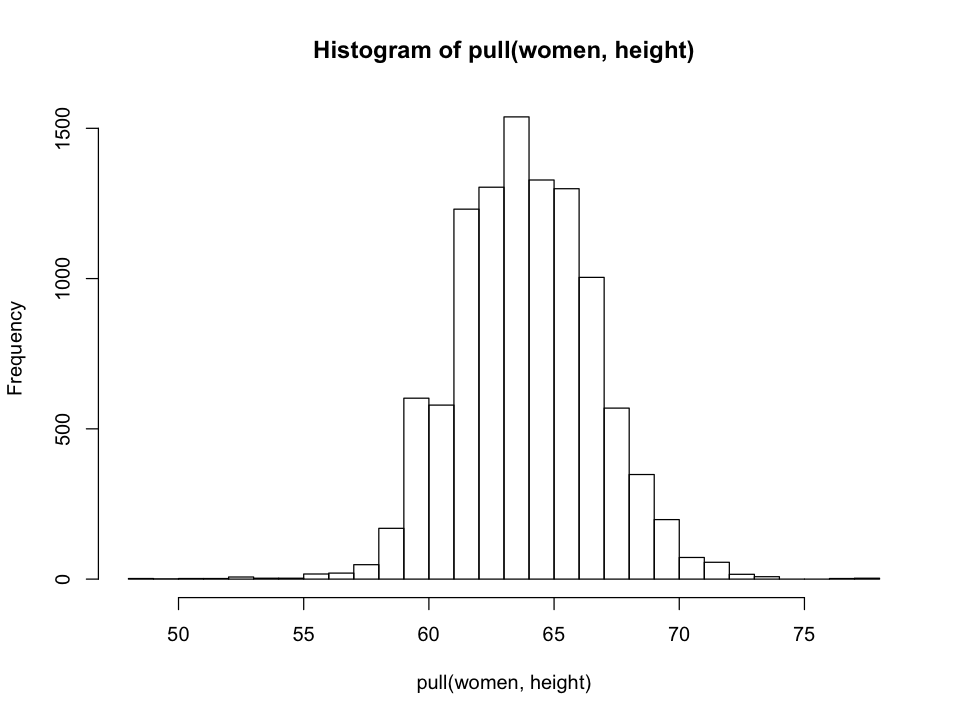

In [27]:
options(repr.plot.width=8, repr.plot.height=6)

hist(pull(women,height),breaks=30)

In words, this distribution has a symmetric shape. It has a single mode or "bump." If you look closely at the heights you see something interesting.

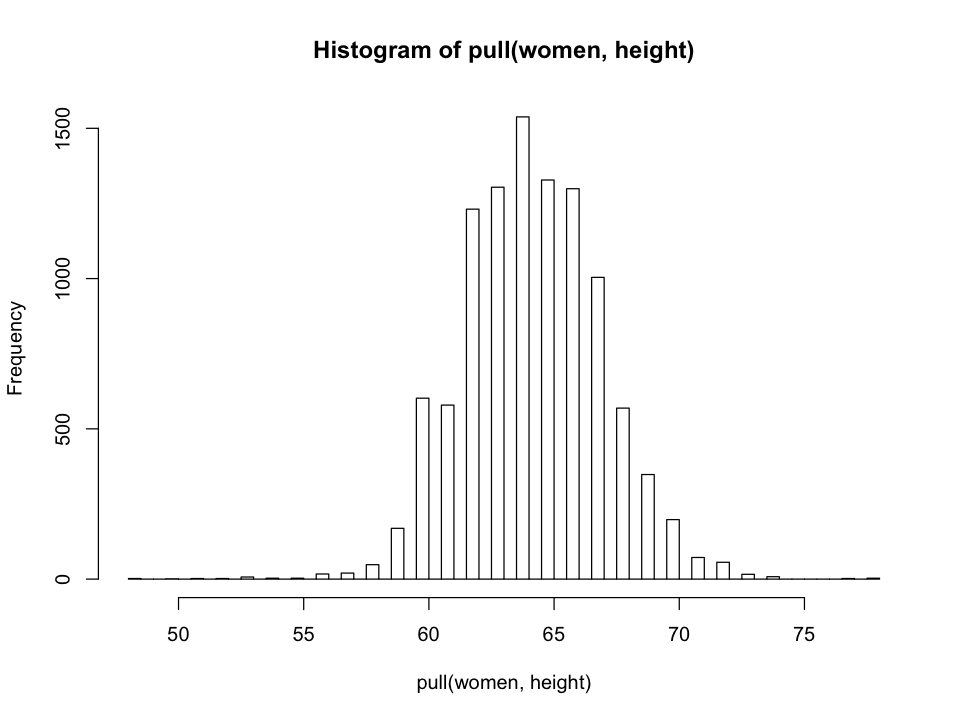

In [28]:
hist(pull(women,height),breaks=100)

People report their height in integers (counting numbers), as opposed to saying they are 70.33 inches tall. 

Make a data set for men and create a histogram of their weights. What do you see? Zoom in with a large number of breaks and tell me what you see.

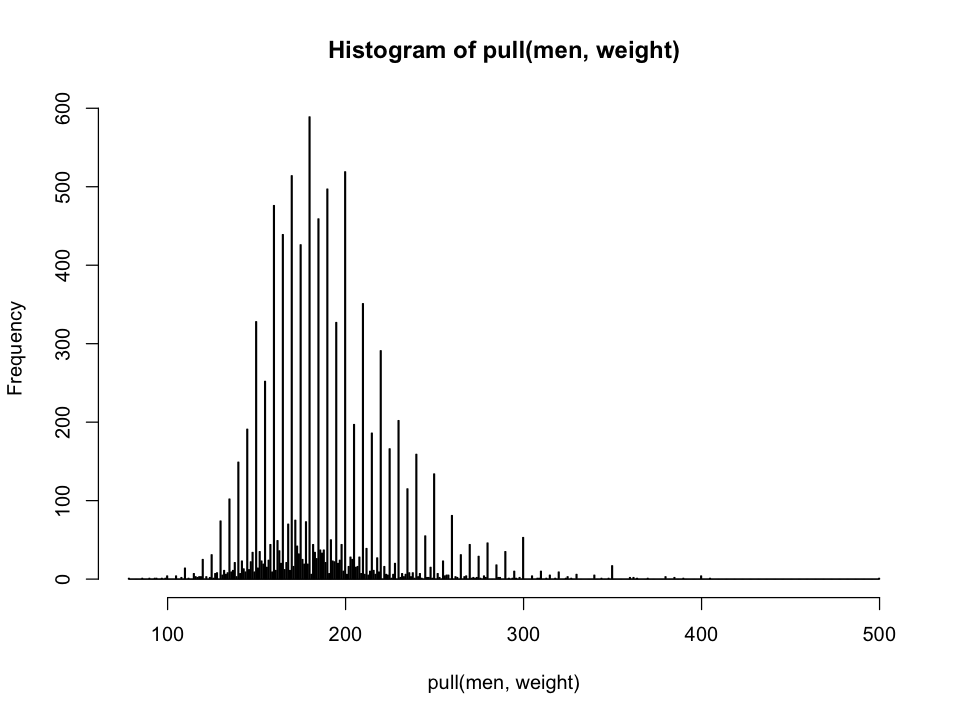

In [36]:
# your code here
men <- filter(cdc,gender=="m")
hist(pull(men,weight), breaks=1000)


**Tell me what you see**

Just like with the height, there seem to be "gaps" in the data – looks like some people will round their weight (down?), while others give a more precise measurement. Also, it has a long tail to the right (i.e. heavier outliers)

When variables are skewed rather than symmetric (meaning one half is more spread out than the other -- the weight histogram above is a good example), then summary statistics like the mean are problematic. We will see that the mean can be heavily influenced by a single, large value and so skewed data can cause the mean to be a bad summary statistic. The mean and standard deviation (we'll define these formally in class) are associated with the bell curve or normal distribution -- it is the canonical "well behaved" symmetric shape. For skewed data, we might use something more "robust" like a median. We'll get to this in detail in class.

Determining if something is bell shaped is important, so much so that there are better plots for making the judgement call. In class we'll see something called a Q-Q plot (quantile-quantile) that, if a straight line, means the data are closely approximated by a bell curve. Here's one of men's weights just to show you what it looks like. We'll go over the construction in class. For now, the point is that a graphic that has us decide if our plot follows a line or not is easier to work with than judging shape from a histogram.

The plot below of men's weights starts like a line and then tips up. That tip up means the right end of the data are more spread out than you'd expect if the data were a bell shape. 

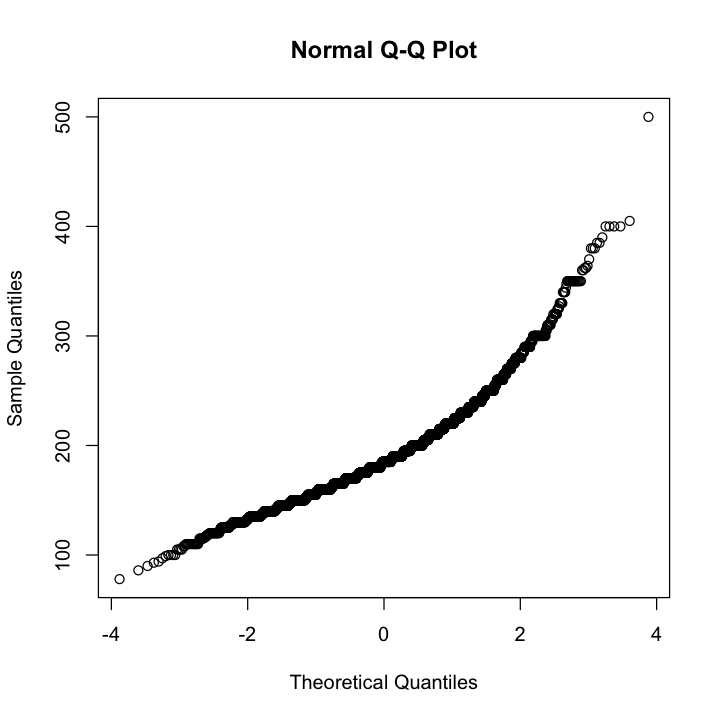

In [37]:
options(repr.plot.width=6, repr.plot.height=6)

men <- filter(cdc,gender=="m")
qqnorm(pull(men,weight))

**The hardest places to live**

The next data set comes from the New York Times as part of a series on life in the United States. [Skim the article here.](https://www.nytimes.com/2014/06/26/upshot/where-are-the-hardest-places-to-live-in-the-us.html) There's a lot to quibble with in this piece, but let's just yank the data and have a look at some of the variables. For a bonus, find where the data are hiding! I have pulled it for you and put it on the github site.

In [38]:
hard <- read.csv("https://github.com/cocteau/lede2018/raw/master/data/unemployment.csv",as.is=TRUE)
head(hard)

state,state_abbr,county,id,rank,education,income,unemployment,disability,life,obesity,votes_dem,votes_gop,total_votes,winner
Alabama,AL,Autauga,1001,1371,21.7,53773,6.5,1.6,76.1,38,5908,18110,24661,Trump
Alabama,AL,Baldwin,1003,657,27.7,50706,6.8,1.0,77.7,34,18409,72780,94090,Trump
Alabama,AL,Barbour,1005,2941,14.5,31889,11.2,2.9,74.7,47,4848,5431,10390,Trump
Alabama,AL,Bibb,1007,2803,9.0,36824,7.6,2.6,74.2,43,1874,6733,8748,Trump
Alabama,AL,Blount,1009,2000,12.4,45192,6.2,1.4,75.9,40,2150,22808,25384,Trump
Alabama,AL,Bullock,1011,3083,11.9,34500,13.4,3.8,71.8,49,3530,1139,4701,Clinton


Each row is a county in the US and the variables are described in the NYT article. Let's sort the data by life expectancy, putting the counties with people having the shortest life expectancies first. This uses the dplyr verb `arrange()`.

In [39]:
head(arrange(hard,life))

state,state_abbr,county,id,rank,education,income,unemployment,disability,life,obesity,votes_dem,votes_gop,total_votes,winner
West Virginia,WV,McDowell,54047,3116,5.7,22972,9.7,10.5,68.4,47,1429,4614,6179,Trump
Kentucky,KY,Perry,21193,3050,13.7,32676,12.0,7.1,69.6,44,2136,8158,10566,Trump
Mississippi,MS,Bolivar,28011,2855,20.4,27768,10.4,5.2,69.7,45,8410,4251,12831,Clinton
Mississippi,MS,Quitman,28119,3120,11.8,23115,12.7,4.8,70.1,51,2303,998,3353,Clinton
Mississippi,MS,Tunica,28143,3075,14.5,30463,15.1,3.7,70.1,49,2577,840,3463,Clinton
Mississippi,MS,Sunflower,28133,3108,13.1,26611,14.6,3.9,70.4,50,6560,2768,9406,Clinton


In [40]:
glimpse(hard)

Observations: 3,134
Variables: 15
$ state        <chr> "Alabama", "Alabama", "Alabama", "Alabama", "Alabama",...
$ state_abbr   <chr> "AL", "AL", "AL", "AL", "AL", "AL", "AL", "AL", "AL", ...
$ county       <chr> "Autauga", "Baldwin", "Barbour", "Bibb", "Blount", "Bu...
$ id           <int> 1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1017, ...
$ rank         <int> 1371, 657, 2941, 2803, 2000, 3083, 2981, 2451, 2967, 2...
$ education    <dbl> 21.7, 27.7, 14.5, 9.0, 12.4, 11.9, 12.9, 16.0, 11.0, 1...
$ income       <int> 53773, 50706, 31889, 36824, 45192, 34500, 30752, 40093...
$ unemployment <dbl> 6.5, 6.8, 11.2, 7.6, 6.2, 13.4, 10.9, 7.6, 9.3, 7.1, 6...
$ disability   <dbl> 1.6, 1.0, 2.9, 2.6, 1.4, 3.8, 3.2, 2.4, 2.6, 2.2, 2.1,...
$ life         <dbl> 76.1, 77.7, 74.7, 74.2, 75.9, 71.8, 73.8, 73.3, 73.3, ...
$ obesity      <int> 38, 34, 47, 43, 40, 49, 45, 40, 44, 41, 43, 46, 44, 42...
$ votes_dem    <int> 5908, 18409, 4848, 1874, 2150, 3530, 3716, 13197, 5763...
$ votes_gop    <in

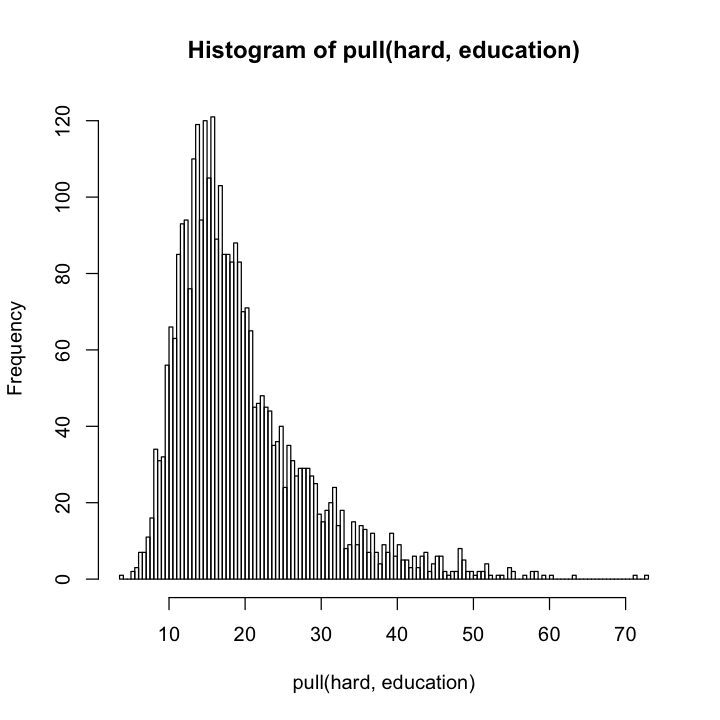

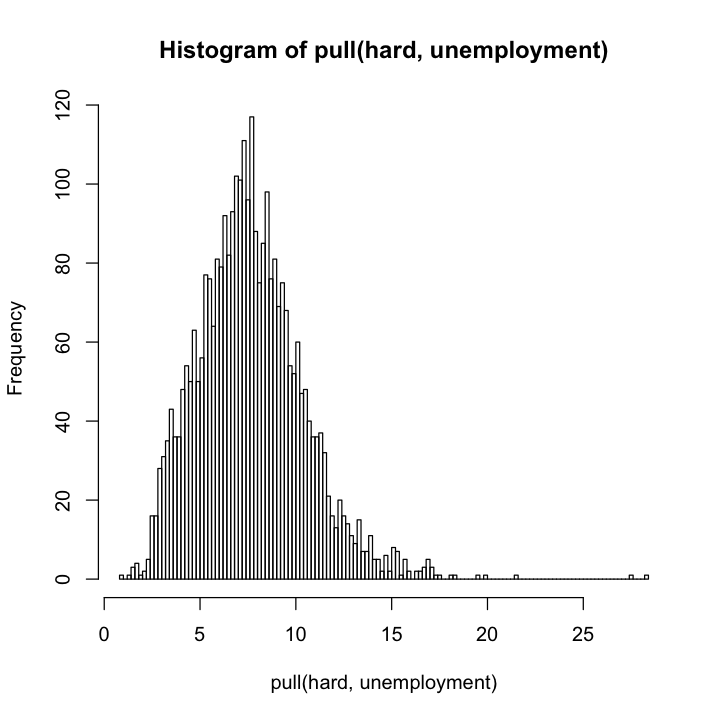

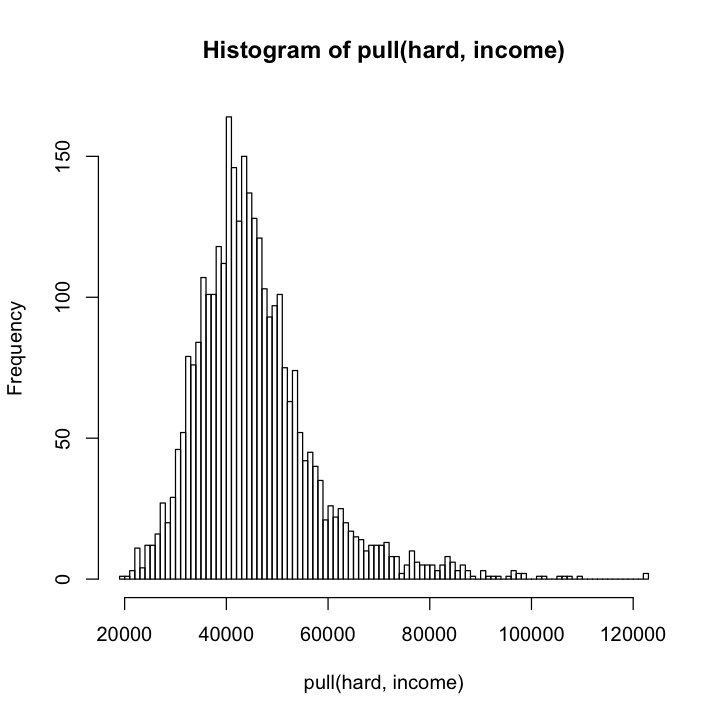

In [46]:
# make a histogram of a couple of the varialbles and describe their shapes
hist(pull(hard,education), breaks=100)
# skews to the right (lots of low education, then a few that are very well educated)

hist(pull(hard,unemployment), breaks=100)
# same as above, again with a few outliers with very heavy unemployment

hist(pull(hard,income), breaks=100)
# skewed to the right – and a tiny outlier to the very left (probably the 120000 and above category)

Sometimes we want to consider the relationship between two or more variables. To see the "shape" of that relationship, we might instead create a "scatter plot" -- we'll get a lot of mileage out of this display.

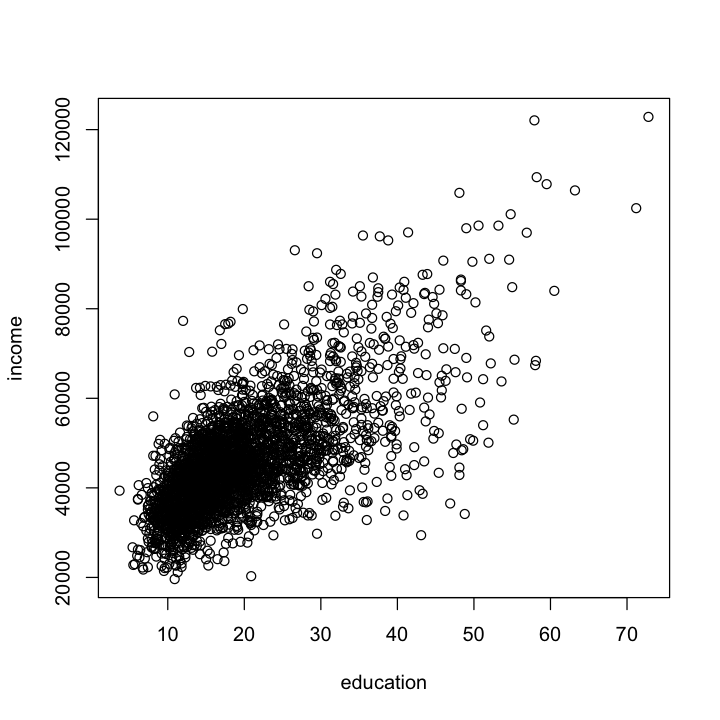

In [47]:
plot(income~education,data=hard)

To maybe get a little fancy, we can add a "best fit" or "least squares" or "regression" line to this plot. It is meant to describe a simple linear relationship between two variables (in this case). The line highlights aspects of the relationship between the two variables and might be used here as a visual device for judging the adequacy of such a simple description. 

We also include it because it shows you how easy it is to work with data in R. Oh and lm() stands for "linear model."

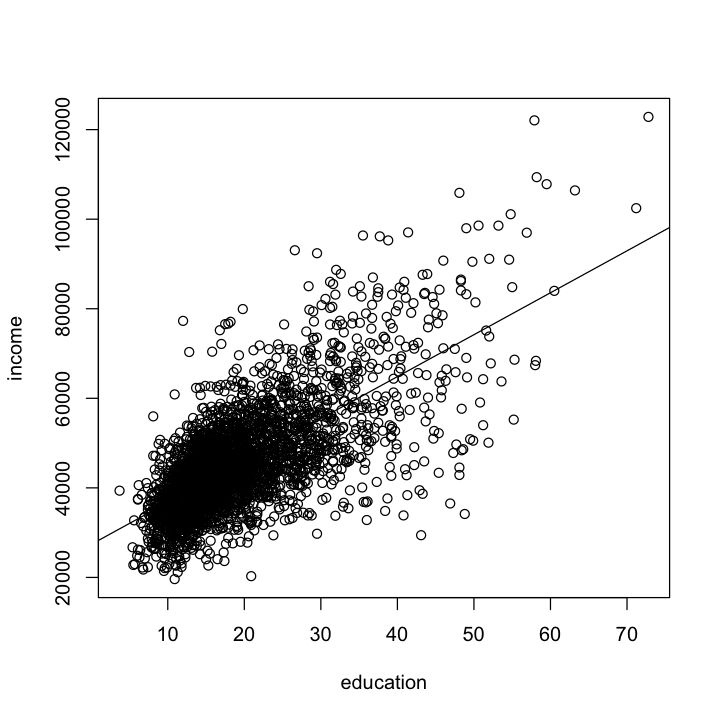

In [48]:
fit <- lm(income~education,data=hard)
plot(income~education,data=hard)
abline(fit)

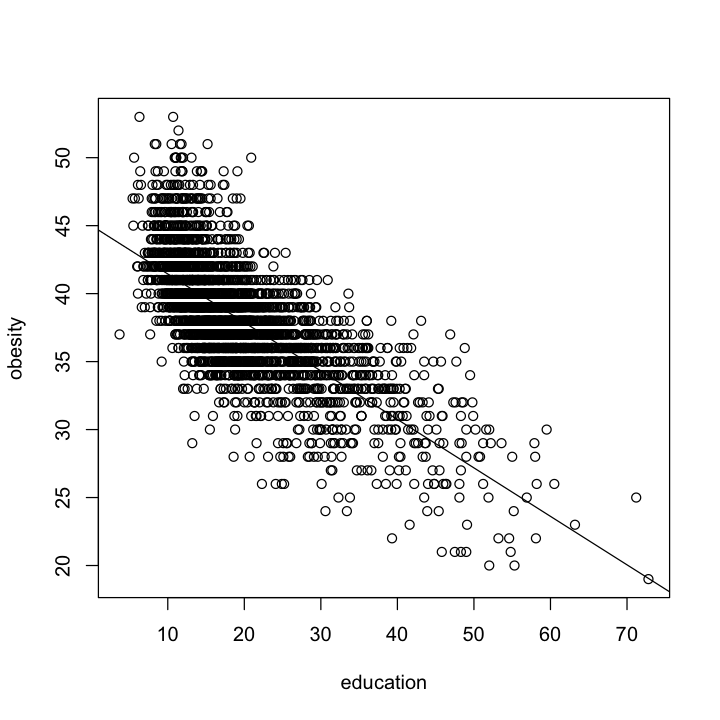

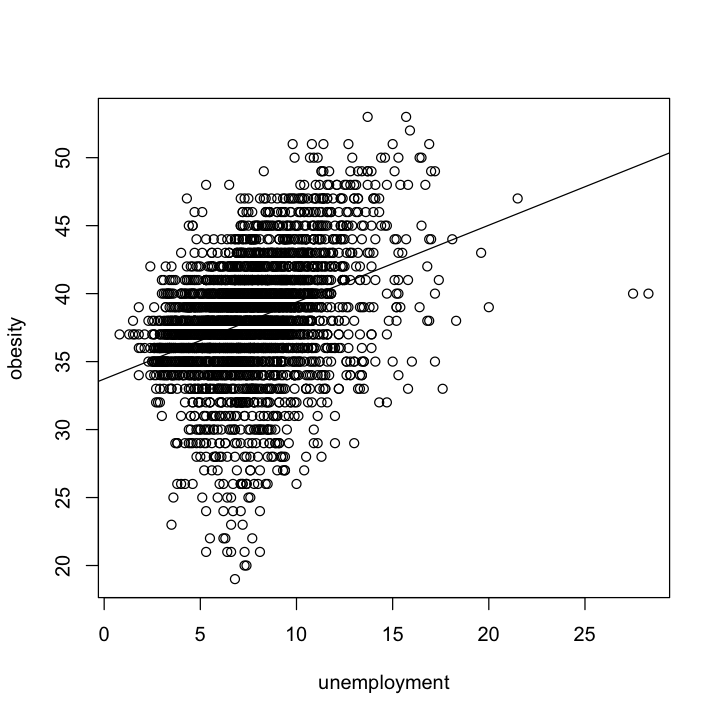

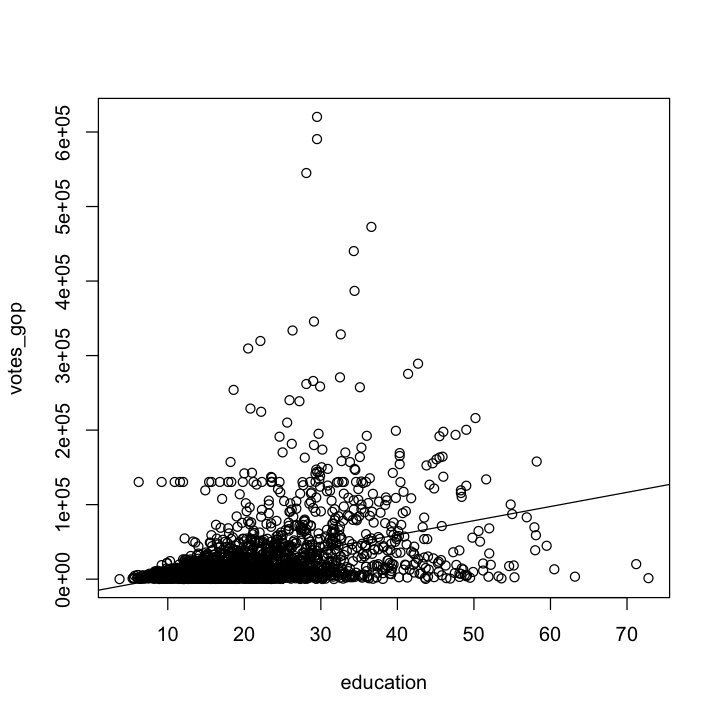

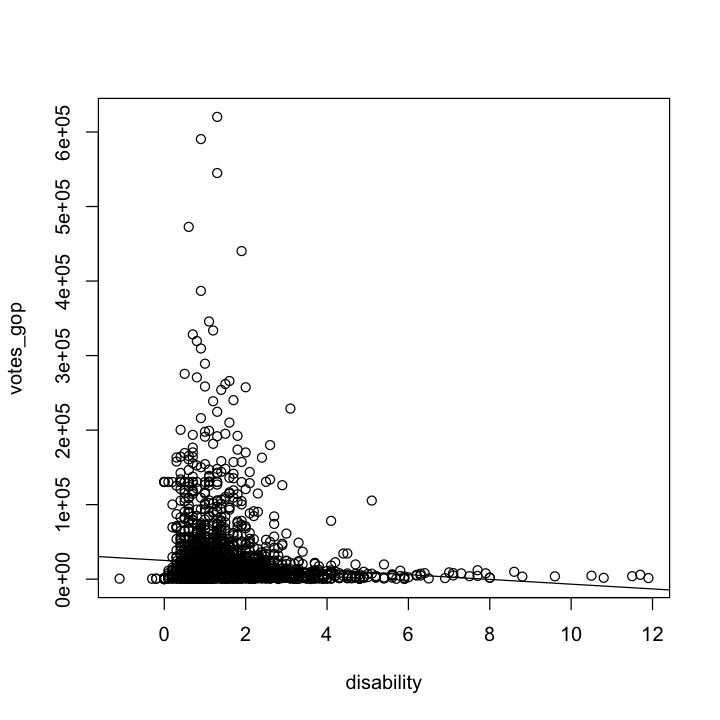

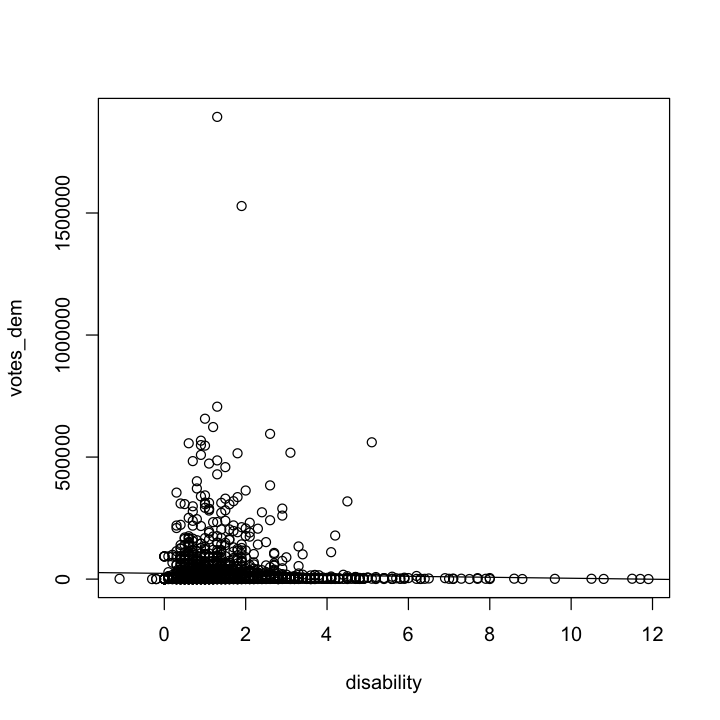

In [53]:
# try some others
fit <- lm(obesity~education,data=hard)
plot(obesity~education,data=hard)
abline(fit)

fit <- lm(obesity~unemployment,data=hard)
plot(obesity~unemployment,data=hard)
abline(fit)

fit <- lm(votes_gop~education,data=hard)
plot(votes_gop~education,data=hard)
abline(fit)

fit <- lm(votes_gop~disability,data=hard)
plot(votes_gop~disability,data=hard)
abline(fit)

fit <- lm(votes_dem~disability,data=hard)
plot(votes_dem~disability,data=hard)
abline(fit)

To get a sense of more than two variables, we might look at several scatterplots at once. We can do this with the "pairs" command. Explain what this is doing!

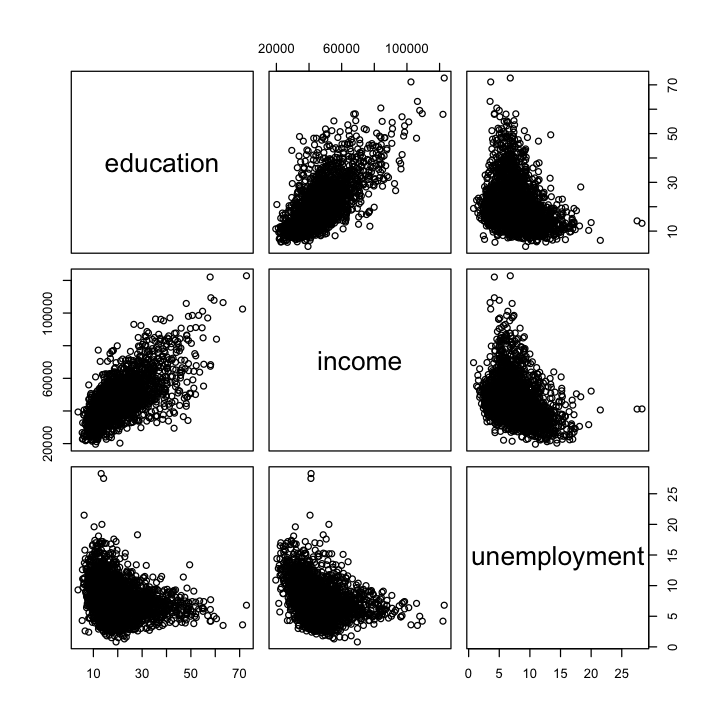

In [56]:
pairs(select(hard,education, income, unemployment))
# it compares several variables at once, to see whether we find a correlation

Let's focus on comparing a few states. These are a little random, but Kentucky is featured in the Times' story. You can mix it up.

In [57]:
states <- c("Georgia","Kansas","Kentucky","Missouri","Texas","Virginia")
hard2 <- filter(hard,state %in% states)
head(hard2)

state,state_abbr,county,id,rank,education,income,unemployment,disability,life,obesity,votes_dem,votes_gop,total_votes,winner
Georgia,GA,Appling,13001,2892,11.3,35875,10.3,1.9,73.3,43,1434,5492,7003,Trump
Georgia,GA,Atkinson,13003,3103,8.7,28682,13.4,2.4,73.1,45,696,1873,2604,Trump
Georgia,GA,Bacon,13005,2940,8.9,33557,9.8,2.1,73.5,43,607,3356,4010,Trump
Georgia,GA,Baker,13007,2959,7.0,24219,8.7,3.2,74.6,43,650,775,1440,Trump
Georgia,GA,Baldwin,13009,2525,19.3,35278,12.0,1.9,75.9,42,7965,7691,16075,Clinton
Georgia,GA,Banks,13011,1999,11.9,40162,6.6,1.1,76.4,39,684,6130,6946,Trump


Conditioning is a way to introduce categorical or qualitative data into your analysis. Not dissimilar from mosaic plots, we can create separate displays for different categories. Here we divide the relationship between income and education "given" state. 

We are going to use a built-in package called `lattice`. It allows for simple conditioning. The downside is that it uses new verbs and not just the standard `plot()`. Here is a plot of income as a function of education given state.

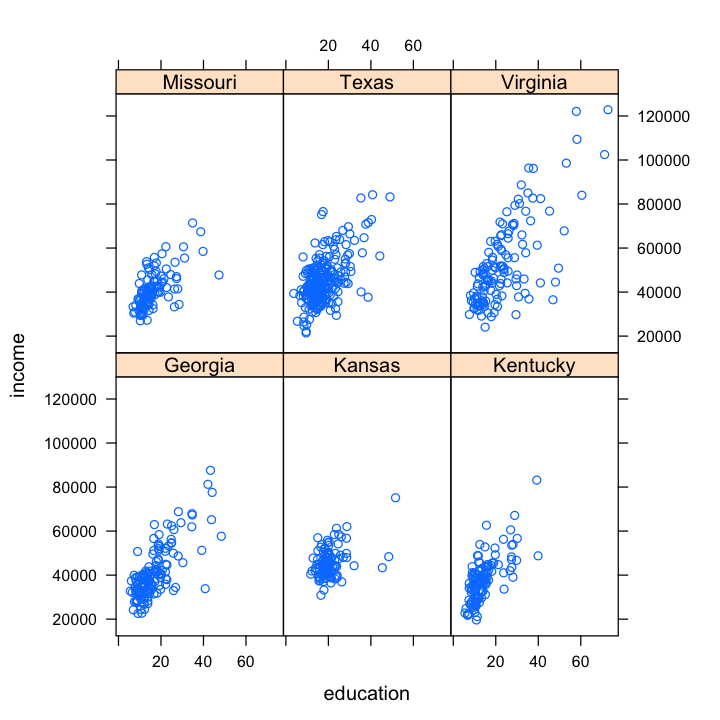

In [58]:
library(lattice)
xyplot(income~education|state,data=hard2)

Notice that all the axes are the same and so we can directly compare the states easily. Lattice also has some simple facilities for 3d plots.

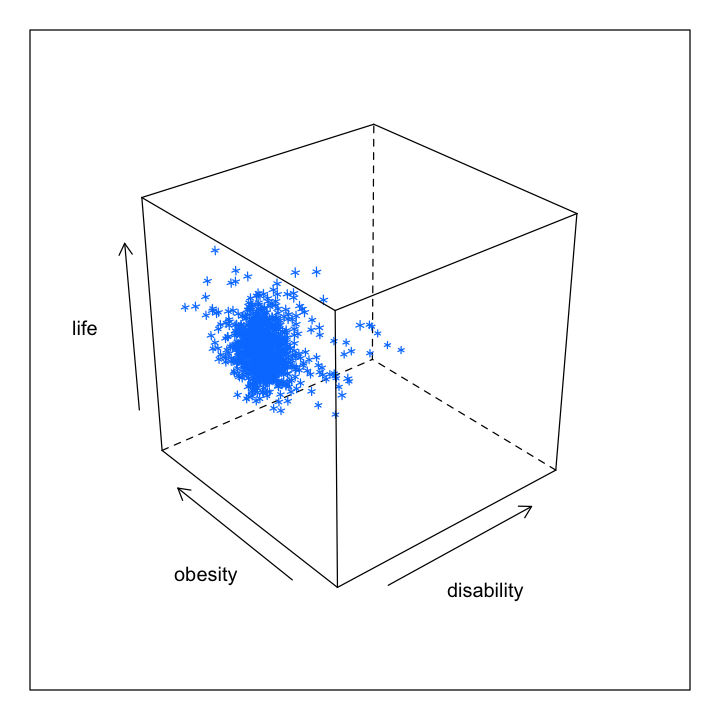

In [59]:
cloud(life~disability+obesity,data=hard2)

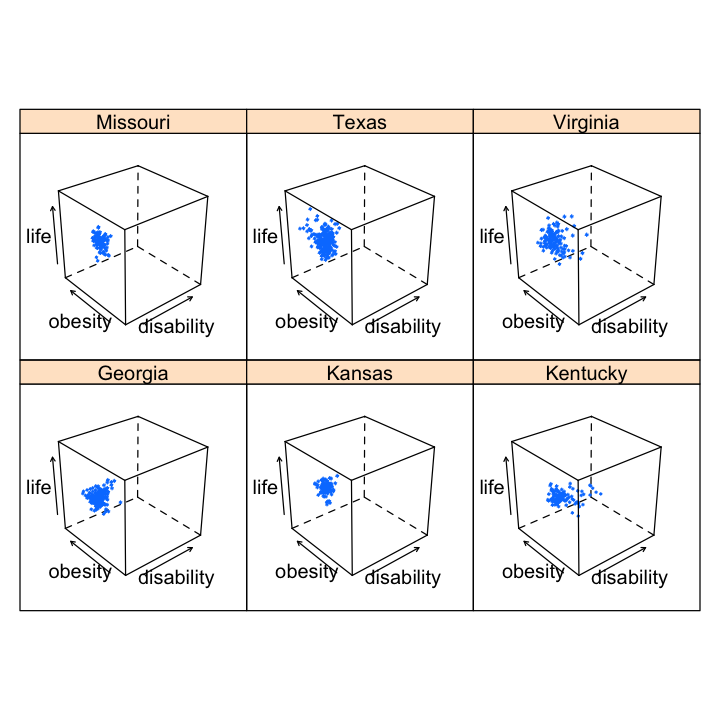

In [60]:
cloud(life~disability+obesity|state,data=hard2)

And here is a gender comparison from the CDC data set. The `lattice` command `histogram()` is its own version that allows for conditioning. Here we make two histograms of respondent heights to the CDC data set, broken down by gender.

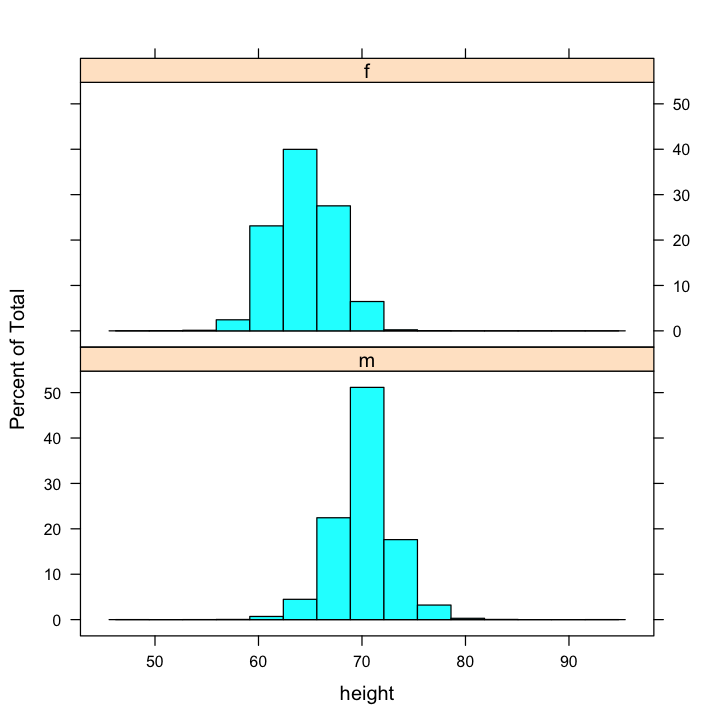

In [61]:
histogram(~height|gender,data=cdc,layout=c(1,2))

**A/B Testing**

The mechanism behind randomized trials is underneath a host of processes that are optimizing headlines, moving content around on home pages, and testing out what kind of content is pushed out to social media. [Have a read about what Buzzfeed does.](https://ijnet.org/en/blog/adaptation-ab-testing-and-analytics-how-buzzfeed-optimizes-news-its-audience) We are now going to load up the data given to us by the New York Times. [Pull it from Dropbox](https://www.dropbox.com/s/x8ud9taqg12s7c4/nyt.csv?dl=0) and place it in the same folder as your notebook. It's a little old now, but the principles are the same. (It was too big for github.)

The treatment, you will recall, was replacing a Tab layout versus a List layout for the top cities and most e-mailed stories. Again, this was an old version of the site. The treatment is stored in a variable called "Variation" (which page variation were people shown) and "IfClicked" (did they click or not). Read in the data and then have a look.

In [63]:
nyt <- read.csv("nyt.csv")
head(nyt)

User_ID,UserVisit_ID,StartTime_SSE,StartTime_English,VisitLength,Variation,RefererUrl,EntryPageUrl,Pageviews,TotalVisits,TimeSinceFirstVisit,UserAgent,IfClicked
293076199,374522966,1227026424,"Tue, Nov 18, 2008 - 16:40:24 (GMT)",8,List,http://www.nytimes.com/pages/politics/index.html,http://travel.nytimes.com/pages/travel/index.html,1,2,59.00,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 1.1.4322; .NET CLR 2.0.50727),0
304430946,374523042,1227026429,"Tue, Nov 18, 2008 - 16:40:29 (GMT)",5,Tabs,http://www.nytimes.com/2008/11/19/business/19markets.html?_r=1&hp,http://travel.nytimes.com/pages/travel/index.html,1,1,40.99,Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.4) Gecko/2008102920 Firefox/3.0.4,0
299920750,374523050,1227026430,"Tue, Nov 18, 2008 - 16:40:30 (GMT)",178,Tabs,http://www.nytimes.com/,http://travel.nytimes.com/,4,2,48.23,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; msie6xpv1; MSIE6ENV21; .NET CLR 1.0.3705; .NET CLR 1.1.4322; .NET CLR 2.0.50727; .NET CLR 3.0.04506.30; MS-RTC LM 8; .NET CLR 3.0.04506.648; .NET CLR 3.5.21022),0
303737899,374523100,1227026433,"Tue, Nov 18, 2008 - 16:40:33 (GMT)",10,Tabs,http://www.nytimes.com/pages/business/smallbusiness/index.html,http://travel.nytimes.com/pages/travel/index.html,1,2,41.98,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 2.0.50727; .NET CLR 3.0.04506.30; .NET CLR 3.0.04506.648; .NET CLR 3.5.21022; InfoPath.1),0
195103988,374523273,1227026446,"Tue, Nov 18, 2008 - 16:40:46 (GMT)",81,List,http://movies.nytimes.com/pages/movies/index.html,http://travel.nytimes.com/pages/travel/index.html,3,45,213.81,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; .NET CLR 1.1.4322; .NET CLR 2.0.50727; .NET CLR 3.0.04506.30; InfoPath.1; .NET CLR 3.0.04506.648),0
281218142,374523374,1227026455,"Tue, Nov 18, 2008 - 16:40:55 (GMT)",336,Tabs,http://www.nytimes.com/,http://travel.nytimes.com/,13,2,77.27,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 1.1.4322; .NET CLR 2.0.50727; .NET CLR 3.0.04506.30),0


The variables above include the following.

> User_ID - A unique number for each visitor
<br> UserVisit_ID - A unique number for each visit
<br> StartTime_SSE - UNIX time for the start of the visit
<br> StartTime_English - A more humanly readable version of the time
<br> VisitLength - The number of seconds the visitor was reading the Travel Section pages
<br> Variation - The version of the page they received
<br> RefererURL - The page they clicked on to get to the Travel Section (if any)
<br> EntryPageUrl - The first page on nytimes.com they visited
<br> Pageviews - The number of pages viewed in the Travel Section
<br> TotalVisits - The total number of visits to the site
<br> TimeSinceFirstVisit (days) - How long had it been since their first visit
<br> UserAgent - Their browser
<br> TotalClicks - How many times did they ckick on the "most popular" field
<br> IfClicked - 0/1 did they click on the "most popular" field at least once

This data set was collected in 2008 (sadly) and even then you get an idea for how much information sites have to help adapt content to your preferences. A/B testing is just one strategy. There is plenty here to build up kind of profile of your viewing habits on the NYTimes site.

In [64]:
table(nyt$Variation,nyt$IfClicked)

      
           0     1
  List 65181   766
  Tabs 64836  1244

The "0" column counts people who did not click in the "most popular" area, while a "1" counts all those who did. We see the Tabs option had a lot more people clicking than the List option. But could this difference be due to the randomization?

Following how we proceeded with Hill's data, we can make a copy of the data set and then shuffle the treatment column, under the null hypothesis that both Tabs and Lists encourage people to click on the "most popular" field equally. Let's have a look at a few simulated tables and get a sense of how likely, say, having 1200 people who saw Tabs click on the field. Is it rare, suggesting the null hypothesis is wrong; or is it consistent with the null distribution?

In [65]:
newnyt <- nyt

In [78]:
# do this a few times and watch the count of people in the "died"-"penicillin" cell

newnyt$Variation <- sample(nyt$Variation)
table(select(newnyt,Variation,IfClicked))

         IfClicked
Variation     0     1
     List 64904  1043
     Tabs 65113   967

Because this data set is big (130k rows), we will only simulate 1000 times. The results are clear enough even with this smaller number.

In [75]:
newtrials <- rep(0,1000)

for(i in 1:1000){
    newnyt$Variation <- sample(nyt$Variation)
    newtrials[i] <- sum(newnyt$Variation=="Tabs" & newnyt$IfClicked==1)
}

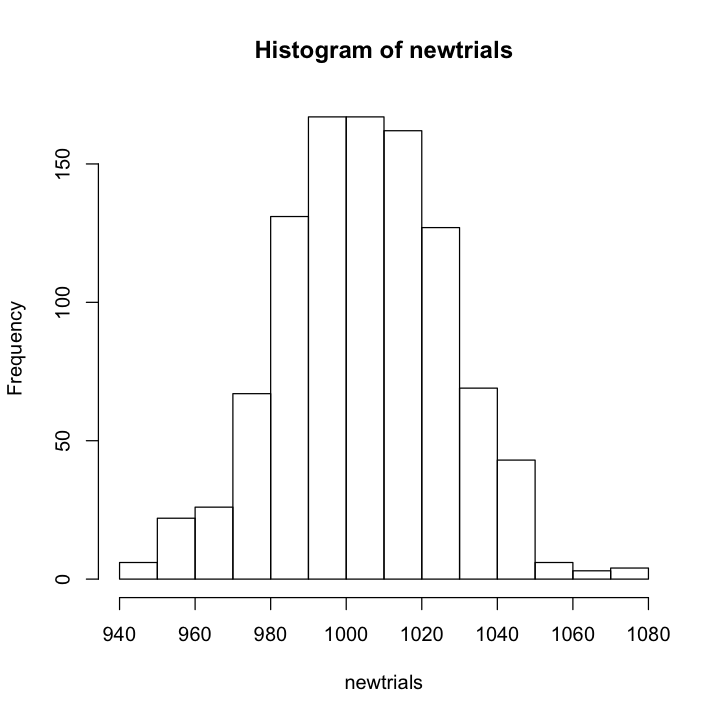

In [76]:
hist(newtrials)

What do you think? Is the data we observed from the Tabs and List experiment consistent with the null hypothesis of "no difference" or is it not? Explain.

**Put your answer here**

The histogram suggests that getting 1200 just by chance is extremely unlikely, so I guess we can discard the 0 hypothesis.